In [2]:
import numpy as np
import pandas as pd
import scipy.io as sio

## Q4 (a)

In [3]:
df = sio.loadmat("face_emotion_data.mat")
X = df["X"]
y = df["y"]

In [17]:
X.shape[0]

128

In [18]:
X[2:,:].shape

(126, 9)

In [4]:
y.shape

(128, 1)

In [5]:
y[:10]

array([[-1],
       [ 1],
       [-1],
       [ 1],
       [ 1],
       [-1],
       [ 1],
       [-1],
       [ 1],
       [ 1]], dtype=int16)

In [6]:
def weights(X, y):
    XT = np.transpose(X)
    A = np.dot(XT, X)
    AI = np.linalg.inv(A)
    p = np.dot(AI, XT)
    w = np.dot(p, y)
    return w

In [14]:
U = np.array([[1,2], [2,-1],[-3,2]])

In [15]:
y = np.array([[0],[1],[-1]])

In [16]:
U.shape

(3, 2)

In [17]:
y.shape

(3, 1)

In [18]:
w = weights(U,y)

In [19]:
w

array([[ 0.3       ],
       [-0.13333333]])

## Q4 (c)

In [11]:
max(w)

array([0.94366942])

## Q4 (e)

A common method for estimating the performance of a classifier is cross-validation (CV).
CV works like this. Divide the dataset into 8 equal sized subsets (e.g., examples 1 − 16,
17 − 32, etc). Use 7 sets of the data to chose your weights, then use the weights to
predict the labels of the remaining “hold-out” set. Compute the number of mistakes
made on this hold-out set and divide that number by 16 (the size of the set) to estimate
the error rate. Repeat this process 8 times (for the 8 different choices of the hold-out
set) and average the error rates to obtain a final estimate.

In [12]:
SETSIZE = 16
def slice(mx, SETSIZE, i):
    if i == 0:
        test = mx[:SETSIZE, :]
        train = mx[SETSIZE:, :]
    elif i == 7:
        test = mx[mx.shape[0]-SETSIZE:, :]
        train = mx[:mx.shape[0]-SETSIZE, :]
    else:
        a = i*SETSIZE
        test = mx[a:a+SETSIZE, :]
        train = np.concatenate((mx[:a, :], mx[a+SETSIZE:, :]))
    return test, train

In [47]:
def cross_validation(X, y):
    error = 0
    for i in range(8):
        xtest, xtrain = slice(X, SETSIZE, i) 
        ytest, ytrain = slice(y, SETSIZE, i)
        wt = weights(xtrain, ytrain)
        yhat = np.dot(xtest, wt)
        #count the number of mad predicted by yhat and y
        yhat = (np.where(yhat>0,1,-1)) 
        dta = yhat - ytest
        #error
        error += dta[np.where(dta!=0)].shape[0]
    rv = error/16
    return rv/8

## Q4 (f)

In [48]:
#The error rate for all nine features 
cross_validation(X, y)

0.046875

In [49]:
X3 = X[:,[0,2,3]]

In [50]:
#The error rate for three features 
cross_validation(X3, y)

0.078125

## Q5 Polynomial Fitting

In [57]:
d = sio.loadmat("polydata.mat")
px = d["x"]
py = d["y"]

In [197]:
w1 = weights(px, py)
w1

array([[0.06082981]])

In [95]:
px

array([[0.81472369],
       [0.90579194],
       [0.12698682],
       [0.91337586],
       [0.63235925],
       [0.0975404 ],
       [0.27849822],
       [0.54688152],
       [0.95750684],
       [0.96488854],
       [0.15761308],
       [0.97059278],
       [0.95716695],
       [0.48537565],
       [0.80028047],
       [0.14188634],
       [0.42176128],
       [0.91573553],
       [0.79220733],
       [0.95949243],
       [0.6557407 ],
       [0.03571168],
       [0.84912931],
       [0.93399325],
       [0.67873515],
       [0.75774013],
       [0.74313247],
       [0.39222702],
       [0.65547789],
       [0.17118669]])

In [198]:
px2 = np.concatenate((px, px*px), axis = 1)

In [199]:
w2 = weights(px2, py)
w2

array([[-0.50447315],
       [ 0.67771647]])

In [200]:
px3 = np.concatenate((px, px2*px), axis = 1)

In [201]:
w3 = weights(px3,py)
w3

array([[-0.3195581 ],
       [ 0.11042771],
       [ 0.40047057]])

In [210]:
min(px)

array([0.03571168])

In [261]:
z1= np.concatenate((w1[::-1], np.array([[0]])), axis = 0)
z2= np.concatenate((w2[::-1], np.array([[0]])), axis = 0)
z3= np.concatenate((w3[::-1], np.array([[0]])), axis = 0)

In [262]:
p1 = np.poly1d(z1.reshape(2,))
p2 = np.poly1d(z2.reshape(3,))
p3 = np.poly1d(z3.reshape(4,))

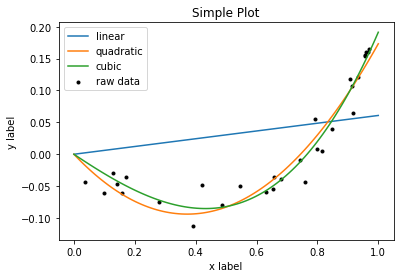

In [285]:
import matplotlib.pyplot as plt
xp = np.linspace(0, 1, 100)
plt.scatter(px, py, label='raw data', marker='.',color='black')
plt.plot(xp, p1(xp), label='linear')
plt.plot( xp, p2(xp), label='quadratic')
plt.plot(xp, p3(xp), label='cubic')

plt.xlabel('x label')
plt.ylabel('y label')

plt.title("Simple Plot")

plt.legend()

plt.show()